# 퍼셉트론 ~ 신경망 학습까지의 실습

In [1]:
try:
    import piplite
    await piplite.install(['ipywidgets'])
except ImportError:
    pass
    
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## OR 퍼셉트론

In [2]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5,0.5])
    b = -0.4
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else :
        return 1

import numpy as np
print("OR(0,0):", OR(0,0))
print("OR(0,1):",OR(0,1))
print("OR(1,0):",OR(1,0))
print("OR(1,1):",OR(1,1))

OR(0,0): 0
OR(0,1): 1
OR(1,0): 1
OR(1,1): 1


# AND 퍼셉트론

In [3]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5,0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else :
        return 1

import numpy as np
print("AND(0,0):", AND(0,0))
print("AND(0,1):",AND(0,1))
print("AND(1,0):",AND(1,0))
print("AND(1,1):",AND(1,1))


AND(0,0): 0
AND(0,1): 0
AND(1,0): 0
AND(1,1): 1


In [4]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

cnt = 0

def f(w1, w2, b):
    global cnt
    #w1 x1 + w2 x2 + b > 0
    #x2 = w1/w2 x0 + b/w2
    plt.figure(figsize=[3, 3])
    
    x = np.linspace(-10, 10, num=1000)
    if w1 == 0 and w2 == 0:
      pass
    elif w2 == 0:
      plt.plot([-b/w1, -b/w1], [-100, 100], c="b")
    else:
      m = w1/w2
      plt.plot(x, -m * x -b/w2, c="b")
    plt.ylim(-1.5, 2.5)
    plt.xlim(-1.5, 2.5)
    plt.xticks([-1, 0, 1, 2])
    plt.yticks([-1, 0, 1, 2])
    
    x1 = np.array([0, 0, 1, 1])
    x2 = np.array([0, 1, 0, 1])
    label = w1 * x1 + w2 * x2 + b > 0
    plt.scatter(x1[label], x2[label], c="r", marker="o", label="True")
    plt.scatter(x1[~label], x2[~label], c="b", marker="x", label="Fales")
    plt.grid("on")
    plt.legend(loc=4)
    plt.show()
    print("x1 | x2 | y ")
    for i in range(4):
      print(" %d |  %d | %d" % (x1[i], x2[i], label[i]))
    cnt += 1
    if cnt > 200:
      print("... 아마 불가능 하다는 것을 발견했을 것이다")

interactive_plot = interactive(f, w1=widgets.FloatSlider( value= 0.2,
           min=-1.0, max=1.0, step=0.05, continuous_update=True),
                               w2=widgets.FloatSlider( value = 0.2,
           min=-1.0, max=1.0, step=0.05, continuous_update=True),
                               b=widgets.FloatSlider( value = -0.1,
           min=-1.5, max=1.5, step=0.05, continuous_update=True),)
#output = interactive_plot.children[-1]
#output.layout.height = '410px'

print("단층 퍼셉트론 파라미터 조정")
print("질문: 단층 퍼셉트론 XOR이 가능한가?")
interactive_plot

단층 퍼셉트론 파라미터 조정
질문: 단층 퍼셉트론 XOR이 가능한가?


interactive(children=(FloatSlider(value=0.2, description='w1', max=1.0, min=-1.0, step=0.05), FloatSlider(valu…

# 다층 퍼셉트론 실습 (XOR)

In [5]:
#XOR을 위한 다층 퍼셉트론
import numpy as np
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5,0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else :
        return 1

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5,-0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else :
        return 1
    
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5,0.5])
    b = -0.4
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else :
        return 1

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    return AND(s1, s2)
        

print("XOR(0,0) = ", XOR(0,0))
print("XOR(0,1) = ",XOR(0,1))
print("XOR(1,0) = ",XOR(1,0))
print("XOR(1,1) = ",XOR(1,1))


XOR(0,0) =  0
XOR(0,1) =  1
XOR(1,0) =  1
XOR(1,1) =  0


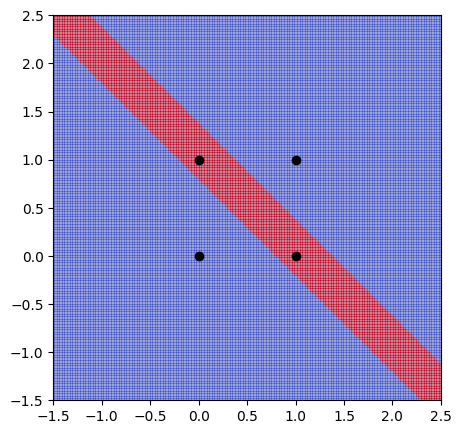

In [6]:
# XOR 다층 퍼셉트론 그림 그려보기
plt.figure(figsize=[5, 5])


ngrid = 151
xyrange = np.linspace(-1.5, 2.5, ngrid)


xx, yy = np.meshgrid(xyrange, xyrange)


heat_test_x = np.stack([xx, yy], axis=-1).reshape([-1, 2])
#print(heat_test_x)

lambda_XOR = lambda x: XOR(x[0], x[1])

pred_heat = np.apply_along_axis(lambda_XOR, 1, heat_test_x)

pred_heat = pred_heat.reshape([ngrid, ngrid])


plt.pcolor(xyrange, xyrange, pred_heat, cmap="coolwarm", alpha=0.5)
plt.xlim(-1.5, 2.5)
plt.ylim(-1.5, 2.5)

plt.scatter([0, 0, 1, 1], [0, 1, 0, 1], c='k')
plt.show()